# PC 3 : Réduction de dimension - 16 juin 2025

Dans ce notebook, nous allons effectuer une analyse en composantes principales d'un jeu de données décrivant les scores obtenus par les meilleurs athlètes ayant participé en 2004 à une épreuve de décathlon, aux Jeux Olympiques d'Athènes ou au Décastar de Talence.

Nous utiliserons pour cela la toolbox `scikit-learn` : http://scikit-learn.org/stable/index.html. `scikit-learn` est un ensemble de librairies de machine learning très utilisée et qui implémente la plupart des algorithmes d'apprentissage automatique non-profond. Il s'agit d'un projet Open Source. 

Dans une deuxième partie, vous vous essayerez à implémenter l'ACP vous-mêmes.

## Librairies python 

Ce notebook a été créé avec les versions suivantes des librairies :
* numpy 2.2.4
* matplotlib 3.10.1
* pandas 2.2.3
* sklearn 1.6.1
* seaborn 0.13.2

Tout devrait bien se passer si vous êtes bien dans l'environnement conda `sdd2025` chargé grâce au fichier `environment.yml` à la racine du répertoire. 

Des différences de version peuvent expliquer des comportements inattendus (avertissements, messages d'erreurs, fonctionalités inexistantes) mais il n'est pas nécessaire a priori d'avoir exactement les versions listées ci-dessus. Si vous souhaitez vérifier les versions des différentes librairies que vous utilisez, vous pouvez utiliser le code suivant :
```python
import <nom du module>
print(<nom du module>.__version__)
```

### Import de numpy et matplotlib

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
plt.rc('font', **{'size': 14}) # règle la taille de police globalement pour les plots (en pt)

## 1. Données

Les données sont contenues dans le fichier `data/decathlon.txt`.

Le fichier contient 42 lignes et 13 colonnes.

La première ligne est un en-tête qui décrit les contenus des colonnes.

Les lignes suivantes décrivent les 41 athlètes.

Les 10 premières colonnes contiennent les scores obtenus aux différentes épreuves.
La 11ème colonne contient le classement.
La 12ème colonne contient le nombre de points obtenus.
La 13ème colonne contient une variable qualitative qui précise l'épreuve (JO ou Décastar) concernée.

Nous allons examiner ces données avec la librairie `pandas`.

In [3]:
import pandas as pd
my_data = pd.read_csv('data/decathlon.txt', sep="\t")  # lire les données dans un dataframe

In [4]:
my_data.head()

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,Decastar
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar


## 2. Quelques rappels sur `pandas`

Assurez-vous que vous comprenez l'usage des fonctionalités ci-dessous

In [5]:
# Lister les noms des colonnes
my_columns = list(my_data.columns) 
print(my_columns)

['100m', 'Long.jump', 'Shot.put', 'High.jump', '400m', '110m.hurdle', 'Discus', 'Pole.vault', 'Javeline', '1500m', 'Rank', 'Points', 'Competition']


In [6]:
# Sélectionner une colonne
my_data['100m'].head()

SEBRLE     11.04
CLAY       10.76
KARPOV     11.02
BERNARD    11.02
YURKOV     11.34
Name: 100m, dtype: float64

In [7]:
# Sélectionner plusieurs colonnes
columns = ['100m', '400m']
my_data[columns].head()

,100m,400m
SEBRLE,11.04,49.81
CLAY,10.76,49.37
KARPOV,11.02,48.37
BERNARD,11.02,48.93
YURKOV,11.34,50.42


In [8]:
# Sélectionner des lignes à partir de la valeur d'une colonne
my_data[my_data['Competition']=='OlympicG'].head()

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition
Sebrle,10.85,7.84,16.36,2.12,48.36,14.05,48.72,5.0,70.52,280.01,1,8893,OlympicG
Clay,10.44,7.96,15.23,2.06,49.19,14.13,50.11,4.9,69.71,282.00,2,8820,OlympicG
Karpov,10.50,7.81,15.93,2.09,46.81,13.97,51.65,4.6,55.54,278.11,3,8725,OlympicG
Macey,10.89,7.47,15.73,2.15,48.97,14.56,48.34,4.4,58.46,265.42,4,8414,OlympicG
Warners,10.62,7.74,14.48,1.97,47.97,14.01,43.73,4.9,55.39,278.05,5,8343,OlympicG


In [9]:
# Dimensions des données
print(my_data.shape)  

(41, 13)


In [10]:
# Valeurs du tableau sous forme d'array numpy
my_data_values = my_data.values
print(type(my_data_values))
print(my_data_values.shape)

<class 'numpy.ndarray'>
(41, 13)


In [11]:
# Type des colonnes
print(my_data.dtypes)  

100m           float64
Long.jump      float64
Shot.put       float64
High.jump      float64
400m           float64
110m.hurdle    float64
Discus         float64
Pole.vault     float64
Javeline       float64
1500m          float64
Rank             int64
Points           int64
Competition     object
dtype: object


In [12]:
# Nombre d'occurrences de chaque valeur unique dans une colonne
my_data['Competition'].value_counts()

Competition
OlympicG    28
Decastar    13
Name: count, dtype: int64

## 3. Exploration des données

### 3.1 Distributions des variables
Visualisons la distribution des 10 variables continues représentant les performances aux 10 épreuves (c'est à dire les 10 premières variables) grâce à des histogrammes :

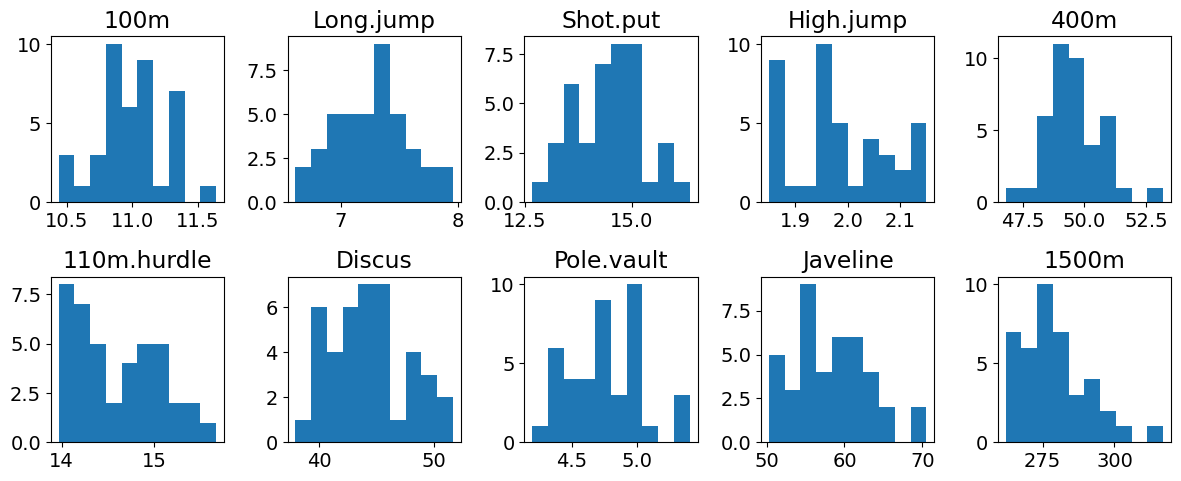

In [13]:
fig = plt.figure(figsize=(12, 5))

# Histogrammes pour les variables continues
for (feat_idx, feat_name) in enumerate(my_data.columns[:10]):
    # créer une sous-figure (subplot) à la position (feat_idx+1) d'une grille 2x5
    ax = fig.add_subplot(2, 5, (feat_idx+1))

    # afficher l'histogramme de la variable feat_name
    h = ax.hist(my_data[feat_name], bins=10, edgecolor='none')

    # utiliser le nom de la variable comme titre pour chaque histogramme
    ax.set_title(feat_name)
    
# espacement entre les subplots
fig.tight_layout(pad=1.0)

Nous pouvons aussi visualiser la distribution de ces variables en fonction de l'épreuve :

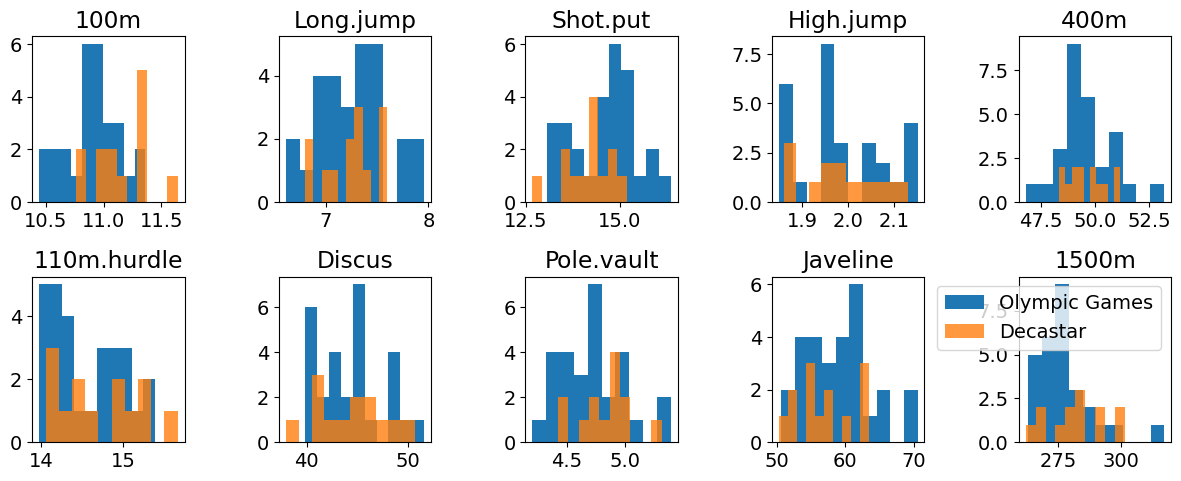

In [14]:
fig = plt.figure(figsize=(12, 5))

# Histogrammes pour les variables continues
for (feat_idx, feat_name) in enumerate(my_data.columns[:10]):
    # créer une sous-figure (subplot) à la position (feat_idx+1) d'une grille 2x5
    ax = fig.add_subplot(2, 5, (feat_idx+1))

    # afficher l'histogramme de la variable feat_name pour Competition=OlympicG
    h = ax.hist(my_data[my_data['Competition']=='OlympicG'][feat_name], bins=10,  
                color='tab:blue', edgecolor='none', alpha=1, label='Olympic Games')
    
    # afficher l'histogramme de la variable feat_name pour Competition=Decastar
    h = ax.hist(my_data[my_data['Competition']=='Decastar'][feat_name], bins=10,  
                color='tab:orange', edgecolor='none', alpha=0.8, label='Decastar')

    # utiliser le nom de la variable comme titre pour chaque histogramme
    ax.set_title(feat_name)

# Légende
plt.legend()

# espacement entre les subplots
fig.tight_layout(pad=1.0)

__Question :__ Les deux compétitions vous semblent-elles avoir des différences ?

__Réponse :__ Juste moins de monde au Decastar

### 3.2. Couples de variables
Représentons les différents athlètes selon leur performance au 400m et au lancer du poids (`Shot.put`)

Text(0, 0.5, 'Performance au lancer du poids')

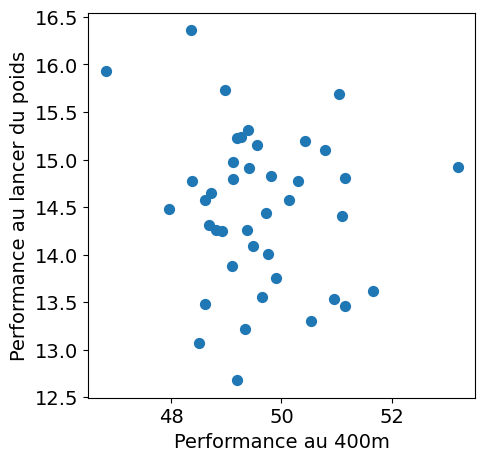

In [15]:
fig = plt.figure(figsize=(5, 5)) # forcer une figure carrée

plt.scatter(my_data['400m'], my_data['Shot.put'], s=50)

plt.xlabel('Performance au 400m')
plt.ylabel('Performance au lancer du poids')

Les fourchettes de valeur prises par ces deux variables sont différentes, leurs unités aussi. Pour mieux les comparer il est souhaitable de les standardiser.

Text(0, 0.5, 'Lancer du poids (performance standardisée)')

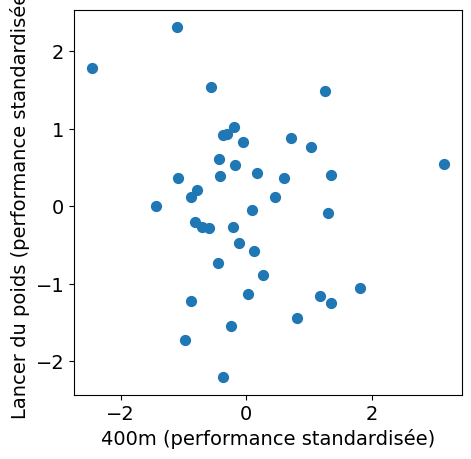

In [16]:
fig = plt.figure(figsize=(5, 5)) # forcer une figure carrée

data_400m_std = (my_data['400m'] - np.mean(my_data['400m']))/(np.std(my_data['400m']))
data_shotput_std = (my_data['Shot.put'] - np.mean(my_data['Shot.put']))/(np.std(my_data['Shot.put']))

plt.scatter(data_400m_std, data_shotput_std, s=50)

plt.xlabel('400m (performance standardisée)')
plt.ylabel('Lancer du poids (performance standardisée)')

__Question :__ Ce nuage de points vous semble-t-il suggérer que les deux performances sont corrélées ?

__Réponse :__ 

#### Alternative avec seaborn
La librairie `seaborn` permet des visualisations plus élaborées que `matplotlib`. Vous pouvez par exemple explorer les capacités de [jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html) :

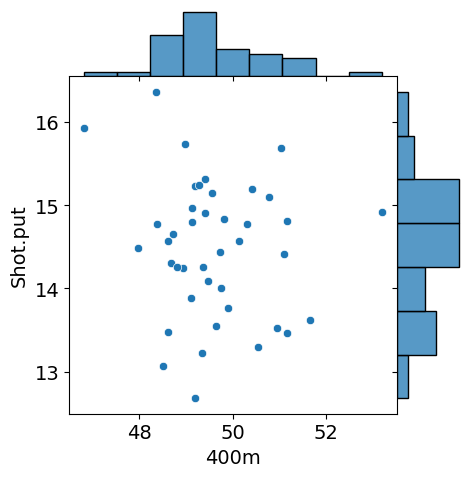

In [17]:
import seaborn as sns
# sns.set_style('whitegrid')

sns.jointplot(x='400m', y='Shot.put', data=my_data, 
              height=5, space=0, color='tab:blue')

#### Corrélation de deux variables

Nous pouvons calculer leur coefficient de corrélation de Pearson grâce au module `scipy.stats`. La fonction `pearsonr` renvoie même une p-valeur : https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

In [18]:
import scipy.stats as st

In [20]:
r, pval = st.pearsonr(my_data['400m'], my_data['100m'])
print(f"Corrélation entre le 100m et le 400m : {r:.2f} (p={pval:.2e})")

Corrélation entre le 100m et le 400m : 0.52 (p=4.89e-04)


__Question :__ Que signifie la valeur entre parenthèses précédée de `p=` ?

__Réponse :__ 

__Question :__ Cela vous semble-t-il en accord avec le nuage de points ?

__Réponse :__ 

__Question :__ Choisissez deux variables dont il vous semble vraisemblable qu'elles soient corrélées. Affichez le nuage de points correspondant. Calculez le coefficient de corrélation de Pearson. Souhaitez-vous rejeter votre hypothèse ?

In [ ]:
r, pval = st.pearsonr(my_data['400m'], my_data['Shot.put'])
print(f"Corrélation entre le lancer du poids et le 400m : {r:.2f} (p={pval:.2e})")

__Réponse :__

#### Matrice de corrélation

Plutôt que de regarder les variables deux par deux, nous pouvons avoir une vue d'ensemble de leurs corrélations en affichant leur matrice de corrélation : 
* la méthode [DataFrame.corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) de `pandas` nous permet de calculer cette matrice ;
* la méthode [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) de `seaborn` nous permet de la visualiser par une carte thermique (_heatmap_).

Text(0.5, 1.0, 'Corrélation entre les performances aux 10 épreuves')

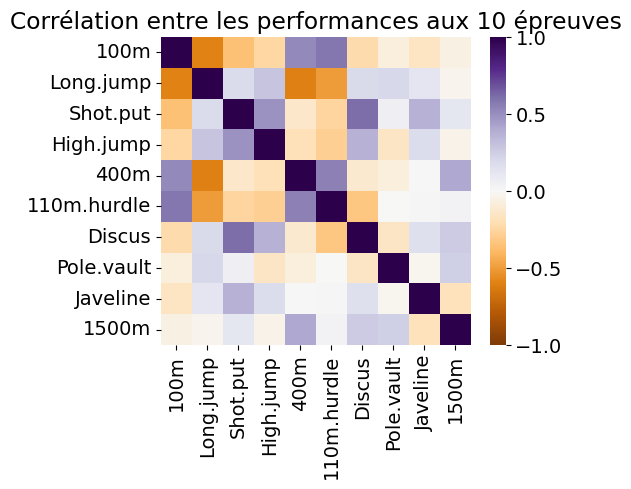

In [21]:
# Calcul de la matrice de corrélation deux à deux
corr_matrix = my_data.drop(columns=['Points', 'Rank', 'Competition']).corr()

# Initialisation figure
plt.figure(figsize=(5, 4))

# Affichage heatmap
sns.heatmap(corr_matrix, 
            vmin=-1, # borne inf des valeurs à afficher
            vmax=1, # borne sup des valeurs à afficher
            center= 0, # valeur médiane des valeurs à afficher,
            cmap='PuOr', # colormap divergente de violet (PUrple) vers orange (ORange)
           )
# Titre
plt.title("Corrélation entre les performances aux 10 épreuves")

__Question :__ Quelles épreuves ont des performances très corrélées ? Quelles épreuves ont des performances indépendantes ?

__Réponse :__ 

## 4. ACP des scores aux 10 épreuves

Nous allons maintenant effectuer une analyse en composantes principales des scores aux 10 épreuves.

### 4.1 Création de l'array numpy correspondant

In [22]:
X = np.array(my_data.drop(columns=['Points', 'Rank', 'Competition']))
print(X.shape)

(41, 10)


__Question :__ 
* Quel est le nombre d'individus dans la matrice de données `X` ?
* Quel est le nombre de variables dans la matrice de données `X` ?

__Réponse :__ 

### 4.2 Standardisation des données

Plus haut, nous avons standardisé les variables nous-mêmes en leur retirant leur moyenne et en les divisant par leur écart-type. Cette tâche est entièrement automatisée par `scikit-learn` :
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [23]:
from sklearn import preprocessing

In [24]:
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

### 4.3 Calcul des composantes principales

Les algorithmes de factorisation de matrice de `scikit-learn` sont inclus dans le module `decomposition`. Pour  l'ACP, référez-vous à : 
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [25]:
from sklearn import decomposition

Remarque : Nous avons ici peu de variables et pouvons nous permettre de calculer toutes les PC. 

La plupart des algorithmes implémentés dans `scikit-learn` suivent le fonctionnement suivant : 
* on instancie un objet, correspondant à un type d'algorithme/modèle, avec ses hyperparamètres (ici le nombre de composantes)
* on utilise la méthode `fit` pour passer les données à cet algorithme
* les paramètres appris sont maintenant accessibles comme arguments de cet objet.

In [26]:
# Instanciation d'un objet PCA pour 10 composantes principales
pca = decomposition.PCA(n_components=10)
print(type(pca))

<class 'sklearn.decomposition._pca.PCA'>


In [27]:
# On passe maintenant les données standardisées à cet objet
# C'est ici que se font les calculs
pca.fit(X_scaled)

PCA(n_components=10)

### 4.4 Proportion de variance expliquée par les PCs

Nous allons maintenant afficher la proportion de variance expliquée par les différentes composantes. Il est accessible dans le paramètre `explained_variance_ration_` de notre objet `pca`.

Text(0, 0.5, 'Proportion de variance expliquée')

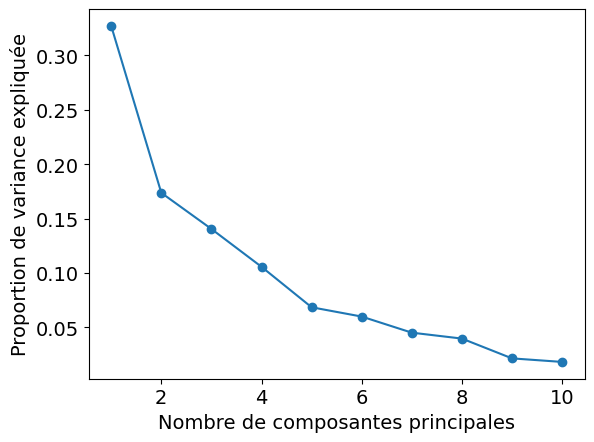

In [28]:
plt.plot(np.arange(1, 11), pca.explained_variance_ratio_, marker='o')

plt.xlabel("Nombre de composantes principales")
plt.ylabel("Proportion de variance expliquée")

__Question :__ Affichez la proportion *cumulative* de variance expliquée

__Réponse :__

__Questions :__ 
* Quelle est la proportion de variance expliquée par les deux premières composantes ? 
* Combien de composantes faudrait-il utiliser pour expliquer 80% de la variance des données ?

__Réponse :__

### 4.5 Projection des données sur les deux premières composantes principales

Nous allons maintenant utiliser uniquement les deux premières composantes principales.

Commençons par calculer la nouvelle représentation des données, c'est-à-dire leur projection sur ces deux PC. 

In [ ]:
pca = decomposition.PCA(n_components=2)
pca.fit(X_scaled)
X_projected = pca.transform(X_scaled)
print(X_projected.shape)

__Question :__ Affichez un nuage de points représentant les données selon ces deux PC.

__Réponse :__

__Question :__ Colorez chaque point du nuage de points ci-dessus en fonction du classement de l'athlète qu'il représente. Qu'en conclure sur l'interprétation de la PC1 ?

__Réponse :__

### 4.6 Interprétation des deux composantes principales
Chaque composante principale est une combinaison linéaire des variables décrivant les données. Les poids de cette combinaison linéaire sont accesibles dans `pca.components_`.

Nous pouvons visualiser non pas les individus, mais les 10 variables dans l'espace des 2 composantes principales.

In [ ]:
pcs = pca.components_
print(pcs[0])

In [ ]:
fig = plt.figure(figsize=(6, 6))

plt.scatter(pcs[0], pcs[1])
for (x_coordinate, y_coordinate, feature_name) in zip(pcs[0], pcs[1], my_data.columns[:10]):
    plt.text(x_coordinate, y_coordinate, feature_name)                          
    
plt.xlabel("Contribution à la PC1")
plt.ylabel("Contribution à la PC2")

__Question :__ Quelles variables ont des contributions très similaires aux deux composantes principales ? Qu'en déduire sur leur similarité ?

__Réponse :__ 

__Question :__ Comment interpréter le signe des contributions des variables à la première composantes principales ?

__Réponse :__  

__Question facultative :__ Comment les valeurs de `pca.explained_variance_ratio_` sont-elles obtenues ? Refaites le calcul vous-mêmes.

## 5 Implémentation de l'ACP
Cette partie s'inspire d'un notebook proposé par Joseph Boyd et Benoît Playe.

### 5.1 Décomposition spectrale de la matrice de covariance

Les deux premières composantes principales de X sont les deux vecteurs propres correspondant aux deux plus grandes valeurs propres de la matrice de covariance $\Sigma = \frac1n X^\top X.$

__Question :__ Utilisez `nunpy.linalg` pour calculer les deux premières composantes principales de X. N'oubliez pas de travailler sur `X_scaled`. Comparez les à celles obtenues dans `pca.components_`.

__Question :__ Calculez la nouvelle représentation en deux dimensions des données. Comparez à celle obtenue avec `pca.transform`.

### 5.2 Décomposition en valeurs singulières

__Question :__ Utiliser `linalg.svd` pour retrouver les deux premières composantes principales. Comparer.